In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_excel("data.xlsx")

In [6]:
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [8]:
df.tail()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
377714,2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
377715,2020-08-07 12:00:00,879.9,895.02,-228.04,-211.28,878.08,-176.94
377716,2020-08-07 12:05:00,887.2,895.7,-230.11,-214.65,885.32,-179.18
377717,2020-08-07 12:10:00,908.5,916.33,-231.51,-218.09,906.2,-181.96
377718,2020-08-07 12:15:00,880.86,905.31,-235.02,-219.44,882.1,-184.02


In [9]:
df.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft'],
      dtype='object')

In [10]:
df.shape

(377719, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


In [13]:
df.describe()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,377719,377719,377719.0,377719,377719,377719.00,377719
unique,377719,39736,39662.0,27669,26487,48044.00,24010
top,2017-01-01 00:00:00,Not Connect,0.0,Not Connect,Not Connect,28.88,Not Connect
freq,1,723,14226.0,723,723,2036.00,723
first,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-08-07 12:15:00,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp              object
Cyclone_Material_Temp               object
Cyclone_Outlet_Gas_draft            object
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object

In [15]:
# Drop rows with string objects
df = df[~df.applymap(lambda x: isinstance(x, str)).any(axis=1)]

# Output the resulting DataFrame
print(df)

                      time Cyclone_Inlet_Gas_Temp Cyclone_Material_Temp  \
0      2017-01-01 00:00:00                 867.63                910.42   
1      2017-01-01 00:05:00                 879.23                918.14   
2      2017-01-01 00:10:00                 875.67                924.18   
3      2017-01-01 00:15:00                 875.28                923.15   
4      2017-01-01 00:20:00                 891.66                934.26   
...                    ...                    ...                   ...   
377714 2020-08-07 11:55:00                 899.42                919.79   
377715 2020-08-07 12:00:00                  879.9                895.02   
377716 2020-08-07 12:05:00                  887.2                 895.7   
377717 2020-08-07 12:10:00                  908.5                916.33   
377718 2020-08-07 12:15:00                 880.86                905.31   

       Cyclone_Outlet_Gas_draft Cyclone_cone_draft Cyclone_Gas_Outlet_Temp  \
0                    

In [16]:
df.shape

(376124, 7)

In [17]:
columns = ['Cyclone_Inlet_Gas_Temp','Cyclone_Material_Temp','Cyclone_Outlet_Gas_draft','Cyclone_cone_draft',
          'Cyclone_Gas_Outlet_Temp','Cyclone_Inlet_Draft']
for column in columns:
    if column!= 'time':
        df[column] = df[column].astype(float)

In [18]:
#again checking datatypes
df.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
dtype: object

In [19]:
#describe the dataset
df.describe()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,376124.000000,376124.000000,376124.000000,376124.000000,376124.000000,376124.000000
mean,727.387946,750.828429,-177.830733,-164.582678,715.798475,-141.309826
std,328.634044,350.922335,99.138694,90.096403,325.316433,77.609444
min,0.000000,-185.000000,-456.660000,-459.310000,13.790000,-396.370000
25%,856.280000,867.660000,-247.190000,-226.770000,802.040000,-193.510000
50%,882.380000,913.360000,-215.260000,-198.570000,871.530000,-169.460000
75%,901.120000,943.660000,-170.150000,-143.680000,899.300000,-136.310000
max,1157.630000,1375.000000,40.270000,488.860000,1375.000000,41.640000


In [20]:
#check for missing values
df.isnull().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

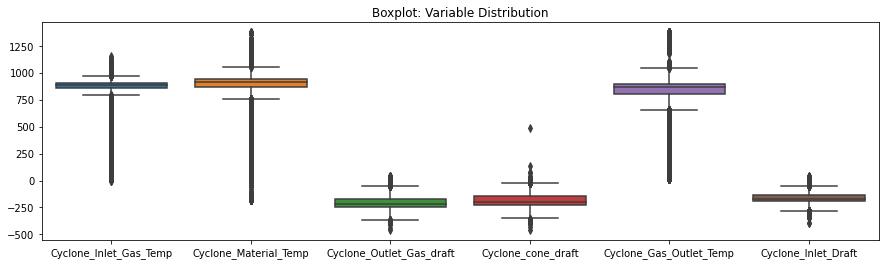

In [24]:
# Check for outliers
plt.figure(figsize=(15, 4))
sns.boxplot(data=df)
plt.title('Boxplot: Variable Distribution')
plt.show()

## Exploratory Data Analysis (EDA)

In [25]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
       Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
count           376124.000000          376124.000000   
mean               727.387946             750.828429   
std                328.634044             350.922335   
min                  0.000000            -185.000000   
25%                856.280000             867.660000   
50%                882.380000             913.360000   
75%                901.120000             943.660000   
max               1157.630000            1375.000000   

       Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
count             376124.000000       376124.000000            376124.000000   
mean                -177.830733         -164.582678               715.798475   
std                   99.138694           90.096403               325.316433   
min                 -456.660000         -459.310000                13.790000   
25%                 -247.190000         -226.770000               802.0

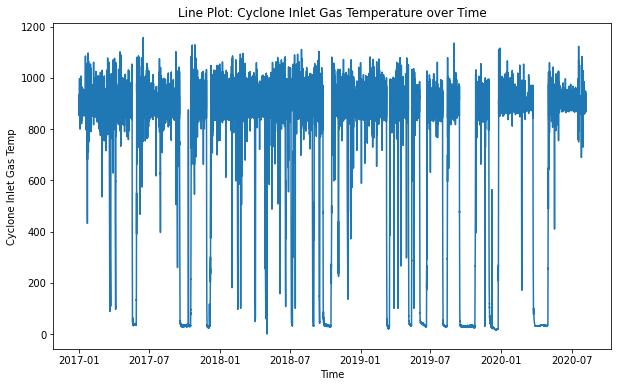

In [26]:
# Line Plots
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Cyclone_Inlet_Gas_Temp'])
plt.xlabel('Time')
plt.ylabel('Cyclone Inlet Gas Temp')
plt.title('Line Plot: Cyclone Inlet Gas Temperature over Time')
plt.show()

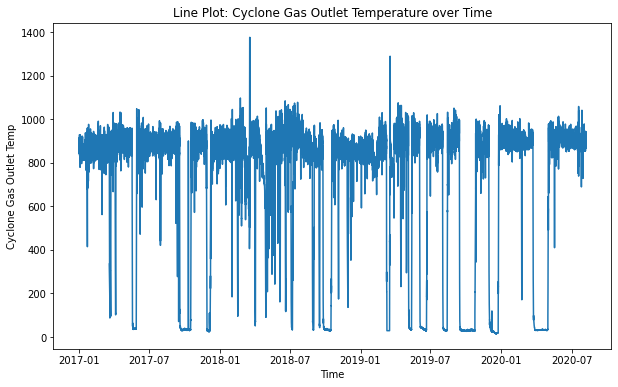

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Cyclone_Gas_Outlet_Temp'])
plt.xlabel('Time')
plt.ylabel('Cyclone Gas Outlet Temp')
plt.title('Line Plot: Cyclone Gas Outlet Temperature over Time')
plt.show()

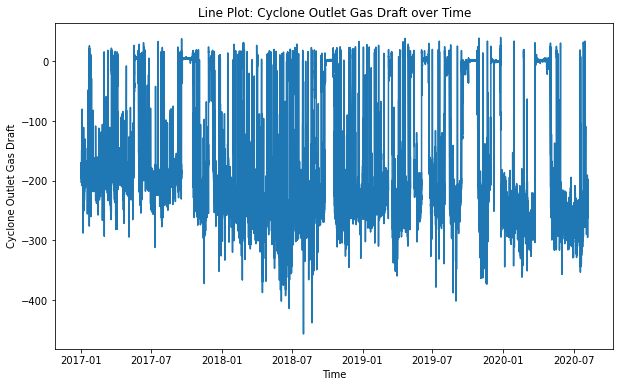

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Cyclone_Outlet_Gas_draft'])
plt.xlabel('Time')
plt.ylabel('Cyclone Outlet Gas Draft')
plt.title('Line Plot: Cyclone Outlet Gas Draft over Time')
plt.show()

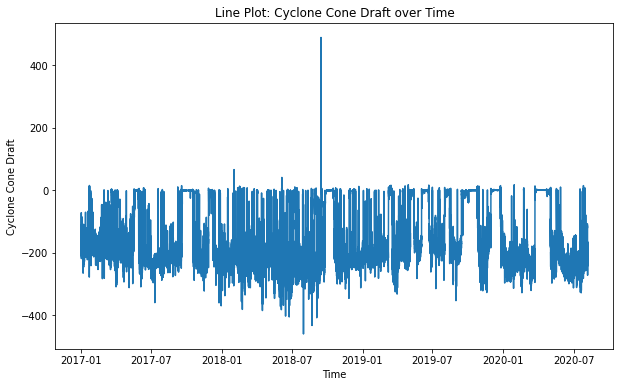

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Cyclone_cone_draft'])
plt.xlabel('Time')
plt.ylabel('Cyclone Cone Draft')
plt.title('Line Plot: Cyclone Cone Draft over Time')
plt.show()

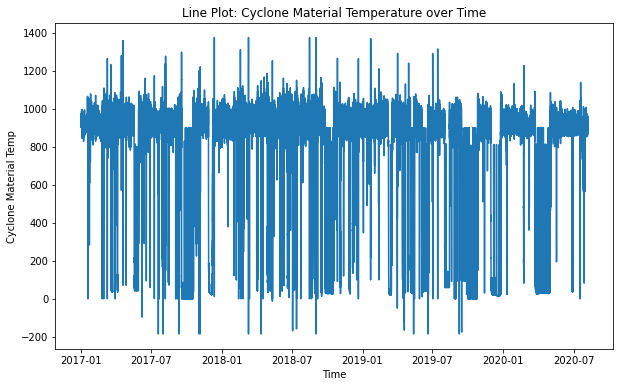

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Cyclone_Material_Temp'])
plt.xlabel('Time')
plt.ylabel('Cyclone Material Temp')
plt.title('Line Plot: Cyclone Material Temperature over Time')
plt.show()

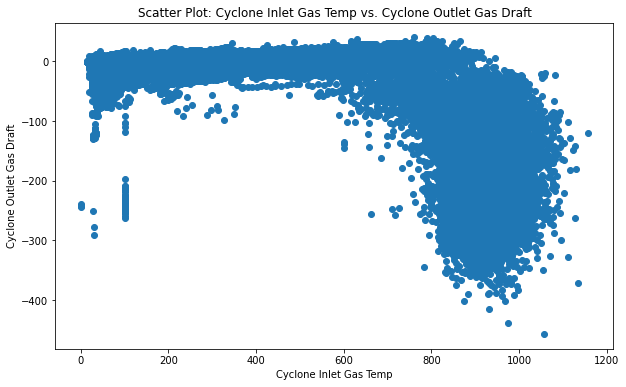

In [31]:
# Scatter Plots
plt.figure(figsize=(10, 6))
plt.scatter(df['Cyclone_Inlet_Gas_Temp'], df['Cyclone_Outlet_Gas_draft'])
plt.xlabel('Cyclone Inlet Gas Temp')
plt.ylabel('Cyclone Outlet Gas Draft')
plt.title('Scatter Plot: Cyclone Inlet Gas Temp vs. Cyclone Outlet Gas Draft')
plt.show()

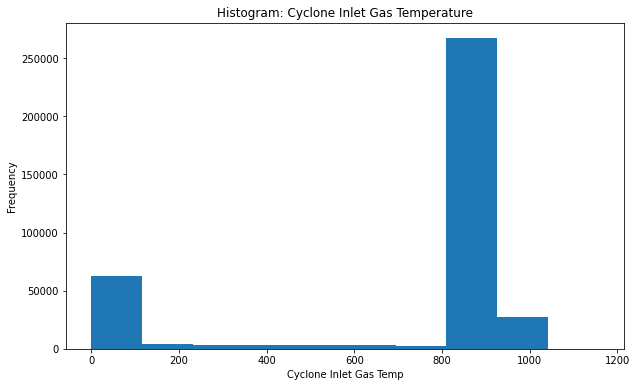

In [32]:
# Histograms
plt.figure(figsize=(10, 6))
plt.hist(df['Cyclone_Inlet_Gas_Temp'], bins=10)
plt.xlabel('Cyclone Inlet Gas Temp')
plt.ylabel('Frequency')
plt.title('Histogram: Cyclone Inlet Gas Temperature')
plt.show()

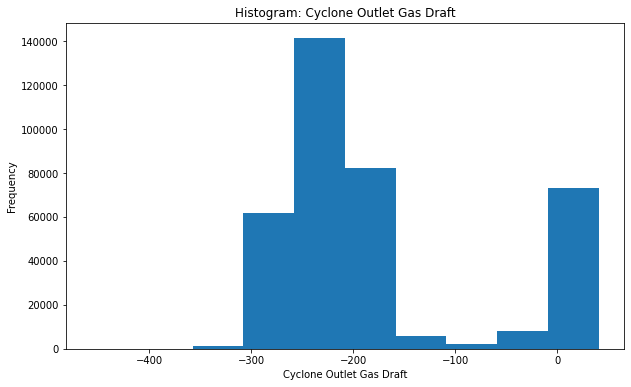

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df['Cyclone_Outlet_Gas_draft'], bins=10)
plt.xlabel('Cyclone Outlet Gas Draft')
plt.ylabel('Frequency')
plt.title('Histogram: Cyclone Outlet Gas Draft')
plt.show()

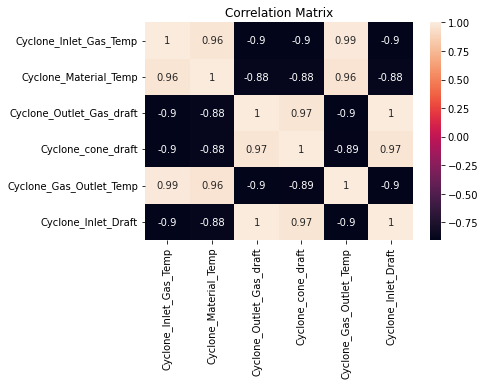

In [34]:
# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [35]:
# Time-Series Analysis

In [36]:
# ARIMA Model
model_arima = ARIMA(df['Cyclone_Outlet_Gas_draft'], order=(1, 0, 1))
model_arima_fit = model_arima.fit()

In [37]:
# Exponential Smoothing (ETS) Model
model_ets = ExponentialSmoothing(df['Cyclone_Outlet_Gas_draft'], trend='add', seasonal='add', seasonal_periods=12)
model_ets_fit = model_ets.fit()

In [38]:
# Generating Forecasts
forecast_arima = model_arima_fit.predict(start=0, end=len(df)-1)
forecast_ets = model_ets_fit.predict(start=0, end=len(df)-1)

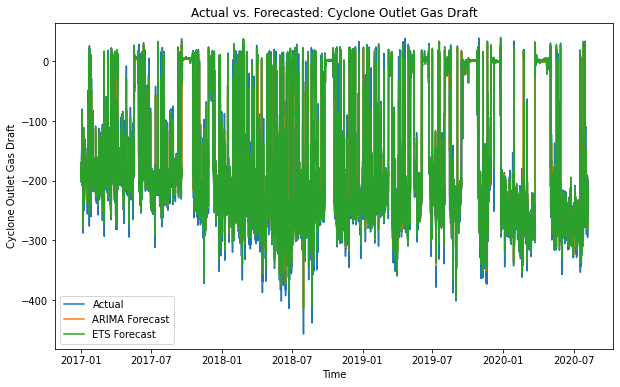

In [40]:
# Plotting Actual vs. Forecasted Values
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Cyclone_Outlet_Gas_draft'], label='Actual')
plt.plot(df['time'], forecast_arima, label='ARIMA Forecast')
plt.plot(df['time'], forecast_ets, label='ETS Forecast')
plt.xlabel('Time')
plt.ylabel('Cyclone Outlet Gas Draft')
plt.title('Actual vs. Forecasted: Cyclone Outlet Gas Draft')
plt.legend()
plt.show()

In [39]:
# Anomaly Detection and Identification

In [44]:
# Calculate the interquartile range (IQR) for each variable
Q1 = df.drop("time", axis=1).quantile(0.25)
Q3 = df.drop("time", axis=1).quantile(0.75)
IQR = Q3 - Q1

In [45]:
# Set the threshold for anomaly detection as 1.5 times the IQR
threshold = 1.5 * IQR

In [46]:
# Identify anomalies for each variable
anomalies = {}
for column in df.columns:
    if column != "time":
        anomalies[column] = df[(df[column] < Q1[column] - threshold[column]) | (df[column] > Q3[column] + threshold[column])]

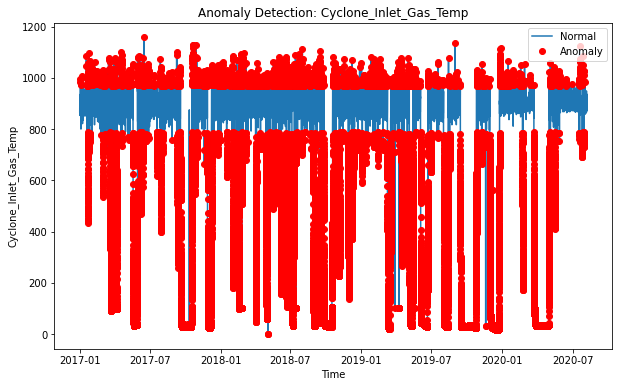

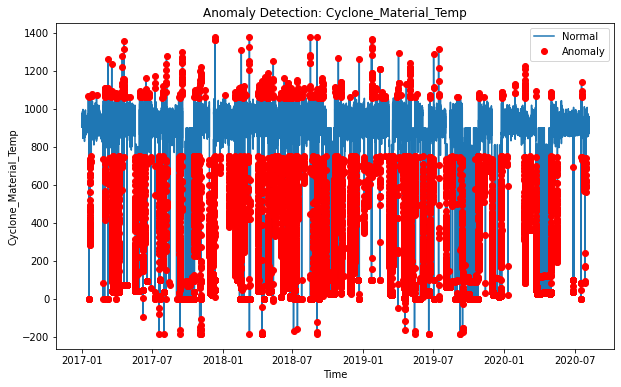

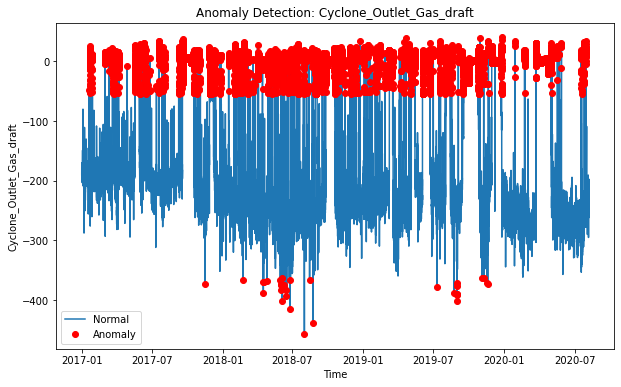

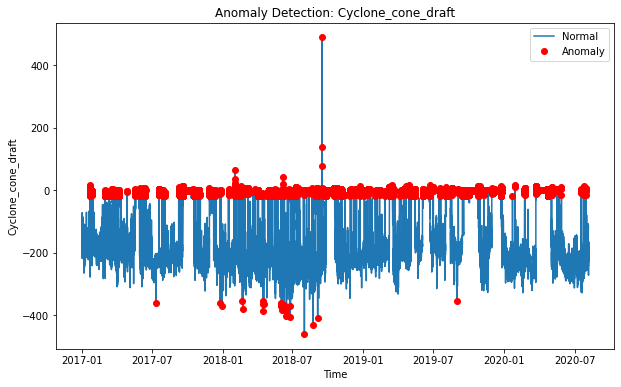

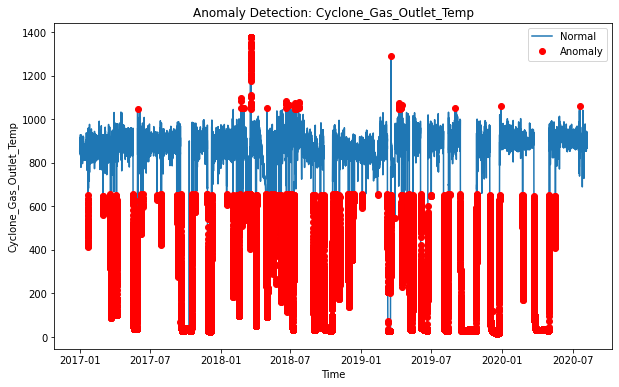

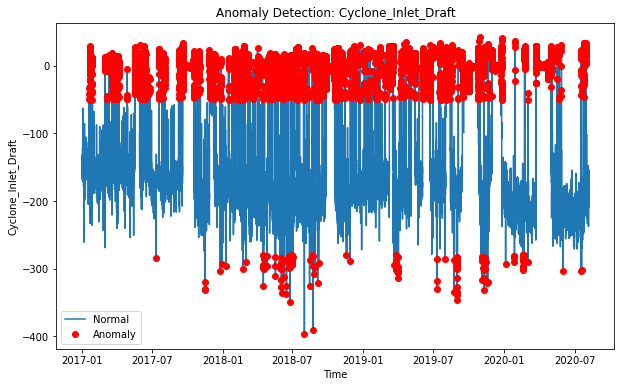

In [47]:
# Plotting Anomalies
for column in df.columns:
    if column != "time":
        plt.figure(figsize=(10, 6))
        plt.plot(df['time'], df[column], label='Normal')
        if column in anomalies:
            plt.plot(anomalies[column]['time'], anomalies[column][column], 'ro', label='Anomaly')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.title(f'Anomaly Detection: {column}')
        plt.legend()
        plt.show()

In [48]:
# Analyze abnormal periods
abnormal_periods = {}
for column, anomaly_df in anomalies.items():
    abnormal_periods[column] = {
        'start_time': anomaly_df['time'].min(),
        'end_time': anomaly_df['time'].max()
    }

# Print abnormal periods for each variable
for column, periods in abnormal_periods.items():
    print(f"Abnormal periods for {column}:")
    print(f"Start time: {periods['start_time']}")
    print(f"End time: {periods['end_time']}")
    print()

Abnormal periods for Cyclone_Inlet_Gas_Temp:
Start time: 2017-01-02 20:30:00
End time: 2020-08-02 17:45:00

Abnormal periods for Cyclone_Material_Temp:
Start time: 2017-01-18 04:05:00
End time: 2020-07-30 11:15:00

Abnormal periods for Cyclone_Outlet_Gas_draft:
Start time: 2017-01-19 09:00:00
End time: 2020-07-30 12:00:00

Abnormal periods for Cyclone_cone_draft:
Start time: 2017-01-23 02:05:00
End time: 2020-07-30 12:00:00

Abnormal periods for Cyclone_Gas_Outlet_Temp:
Start time: 2017-01-23 02:45:00
End time: 2020-07-19 05:15:00

Abnormal periods for Cyclone_Inlet_Draft:
Start time: 2017-01-19 09:00:00
End time: 2020-07-30 12:00:00

